# Week 2
weekly practice from The Math of Intelligence by Siraj Raval

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# for notebook display matplitlib picture
%matplotlib inline

In [2]:
# dummy data
x = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1]
])

y = np.array([-1, -1, 1, 1, 1])

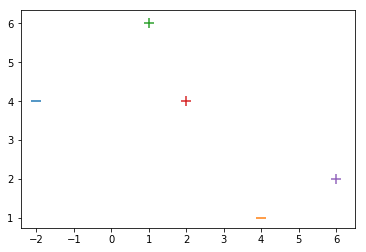

In [7]:
# plot data
for d, sample in enumerate(x):
    # plot the first two negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)


In [15]:
# Using hinge loss function:
# c(loss) = (1 - y * f(x))
# c(loss) = 0 if correct classified, else 1 - y * f(x)

# objective function:
# Numbda * w^2 + sum(c(loss))

def svm_sgd_plot(x, y):
    # Initialize weights
    w = np.zeros(len(x[0]))
    # Learnig rate
    eta = 1
    # Iterations
    epochs = 100000
    # Misclassifications
    errors = []
    
    for epoch in range(1, epochs):
        error = 0
        for i in range(len(x)):
            if y[i] * np.dot(x[i], w) < 1: # missification
                w += eta * (x[i] * y[i] + -2 * (1.0 / epoch) * w)
                error = 1
            else:
                w += eta * (-2 * (1.0 / epoch) * w)
        errors.append(error)
    
    # plot classification errors
    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassificed')
    plt.show()
    
    return w

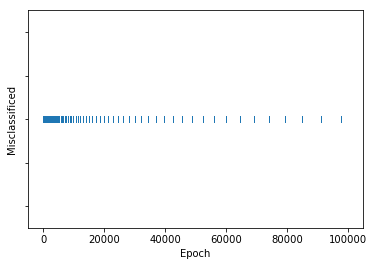

[  1.58876117   3.17458055  11.11863105]


In [24]:
w = svm_sgd_plot(x, y)
print (w)

In [25]:
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

print (x2)
print (x3)

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)

print (X, Y, U, V)

[1.5887611677029299, 3.1745805514807812, -3.1745805514807812, 1.5887611677029299]
[1.5887611677029299, 3.1745805514807812, 3.1745805514807812, -1.5887611677029299]
(1.5887611677029299, 1.5887611677029299) (3.1745805514807812, 3.1745805514807812) (-3.1745805514807812, 3.1745805514807812) (1.5887611677029299, -1.5887611677029299)


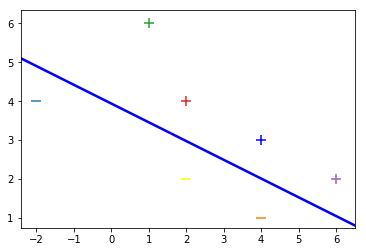

In [26]:
for d, sample in enumerate(x):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')
